<a href="https://colab.research.google.com/github/Nardos24/K-Means-Clustering/blob/main/k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [3]:
iris = datasets.load_iris()
X = iris.data
y_true = iris.target

In [4]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

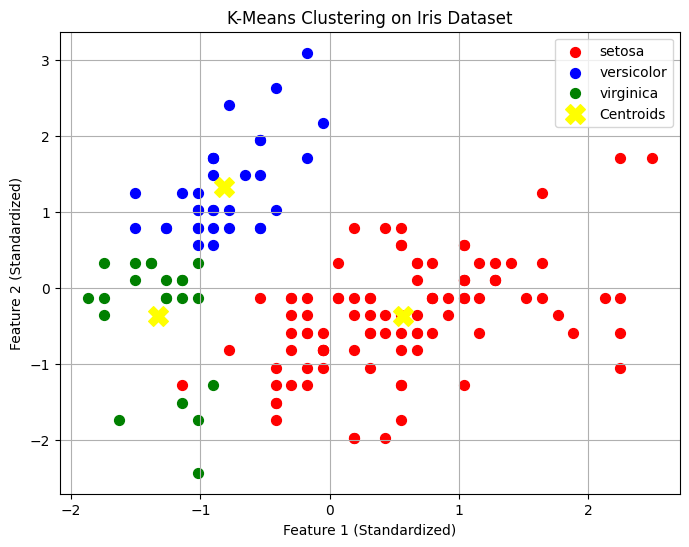

In [5]:
k = 3  # Number of clusters (since there are 3 Iris species)
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Define cluster names and colors
species_names = ['setosa', 'versicolor', 'virginica']
colors = ['red', 'blue', 'green']
centroid_color = 'yellow'

# Plot K-means clustering results
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1],
                s=50, c=colors[i], label=species_names[i])

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c=centroid_color, marker='X', label='Centroids')

# Graph customizations
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


The average Silhouette Score is: 0.48


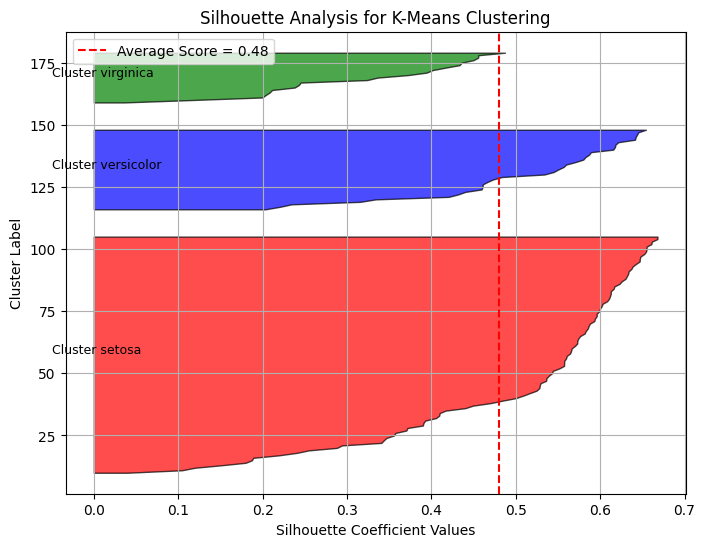

In [6]:
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"The average Silhouette Score is: {silhouette_avg:.2f}")

# Compute Silhouette Values for Each Sample
silhouette_values = silhouette_samples(X_scaled, y_kmeans)

# Plot Silhouette Analysis
plt.figure(figsize=(8, 6))
y_lower = 10  # Starting y-axis value

for i in range(k):  # For each cluster
    # Collect the silhouette values for cluster i
    cluster_silhouette_values = silhouette_values[y_kmeans == i]
    cluster_silhouette_values.sort()

    # Calculate the size of the cluster
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette values for cluster i
    color = colors[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor='k', alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {species_names[i]}", fontsize=9)
    y_lower = y_upper + 10  # Add space between clusters

# Customize Plot
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Average Score = {silhouette_avg:.2f}")
plt.title("Silhouette Analysis for K-Means Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.legend()
plt.grid(True)
plt.show()